<a href="https://colab.research.google.com/github/Bmartins25/Analise_Sentimento_Comentarios_Youtube/blob/main/An%C3%A1lise_de_Sentimentos_Coment%C3%A1rios_Youtube_Andr%C3%A9_e_Bruno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.set_option('display.max_columns',None)

# Carregando os dados

In [ ]:
US_comentarios = pd.read_csv('/content/UScomments.csv', error_bad_lines=False)

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'


In [ ]:
US_videos = pd.read_csv('/content/USvideos.csv', error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [ ]:
US_videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


# Análise dos Dados e Limpeza dos Datasets

In [ ]:
US_videos.shape

(7992, 11)

In [ ]:
US_videos.nunique()

video_id          2364
title             2398
channel_title     1230
category_id         16
tags              2204
views             7939
likes             6624
dislikes          2531
comment_total     4152
thumbnail_link    2364
date                40
dtype: int64

In [ ]:
US_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7992 entries, 0 to 7991
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   video_id        7992 non-null   object 
 1   title           7992 non-null   object 
 2   channel_title   7992 non-null   object 
 3   category_id     7992 non-null   int64  
 4   tags            7992 non-null   object 
 5   views           7992 non-null   int64  
 6   likes           7992 non-null   int64  
 7   dislikes        7992 non-null   int64  
 8   comment_total   7992 non-null   int64  
 9   thumbnail_link  7992 non-null   object 
 10  date            7992 non-null   float64
dtypes: float64(1), int64(5), object(5)
memory usage: 686.9+ KB


In [ ]:
US_videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [ ]:
US_comentarios.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [ ]:
US_comentarios.shape

(691400, 4)

In [ ]:
US_comentarios.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [ ]:
US_comentarios.dropna(inplace=True)

In [ ]:
US_comentarios.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [ ]:
US_comentarios.shape

(691375, 4)

In [ ]:
US_comentarios.nunique()

video_id          2266
comment_text    434076
likes             1284
replies            479
dtype: int64

In [ ]:
US_comentarios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691375 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691375 non-null  object
 1   comment_text  691375 non-null  object
 2   likes         691375 non-null  object
 3   replies       691375 non-null  object
dtypes: object(4)
memory usage: 26.4+ MB


In [ ]:
US_comentarios.drop(41587, inplace=True)

In [ ]:
US_comentarios = US_comentarios.reset_index().drop('index',axis=1)

In [ ]:
US_comentarios.likes = US_comentarios.likes.astype(int)
US_comentarios.replies = US_comentarios.replies.astype(int)

In [ ]:
US_comentarios.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


# Removendo pontuações, caracteres especiais e Números

In [ ]:
US_comentarios['comment_text'] = US_comentarios['comment_text'].str.replace("[^a-zA-Z#]", " ")

# Removendo palavras curtas

In [ ]:
US_comentarios['comment_text'] = US_comentarios['comment_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# Mudando o texto para lower case

In [ ]:
US_comentarios['comment_text'] = US_comentarios['comment_text'].apply(lambda x:x.lower())

# Tokenização

In [ ]:
tokenized_tweet = US_comentarios['comment_text'].apply(lambda x: x.split())
tokenized_tweet.head()

0                                        [logan, paul]
1    [been, following, from, start, your, vine, cha...
2                                     [kong, maverick]
3                                         [attendance]
4                                           [trending]
Name: comment_text, dtype: object

# Lemmantização

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [ ]:
wnl = WordNetLemmatizer()

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
tokenized_tweet.apply(lambda x: [wnl.lemmatize(i) for i in x if i not in set(stopwords.words('english'))])
tokenized_tweet.head()

0                                        [logan, paul]
1    [been, following, from, start, your, vine, cha...
2                                     [kong, maverick]
3                                         [attendance]
4                                           [trending]
Name: comment_text, dtype: object

In [ ]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [ ]:
US_comentarios['comment_text'] = tokenized_tweet

# Análise de Sentimento no dataset US Comments

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Configurando Scores de Sentimento

In [ ]:
US_comentarios['Scores de Sentimentos'] = US_comentarios['comment_text'].apply(lambda x:sia.polarity_scores(x)['compound'])

In [ ]:
US_comentarios.head()

,video_id,comment_text,likes,replies,Sentiment Scores
0,XpVt6Z1Gjjo,logan paul,4,0,0.0
1,XpVt6Z1Gjjo,been following from start your vine channel ha...,3,0,0.0
2,XpVt6Z1Gjjo,kong maverick,3,0,0.0
3,XpVt6Z1Gjjo,attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending,3,0,0.0


# Classificando o sentimento como Negativo, Positivo e Neutro

In [ ]:
US_comentarios['Sentiment'] = US_comentarios['Sentiment Scores'].apply(lambda s : 'Positive' if s > 0 else ('Neutral' if s == 0 else 'Negative'))

In [ ]:
US_comentarios.head()

,video_id,comment_text,likes,replies,Sentiment Scores,Sentiment
0,XpVt6Z1Gjjo,logan paul,4,0,0.0,Neutral
1,XpVt6Z1Gjjo,been following from start your vine channel ha...,3,0,0.0,Neutral
2,XpVt6Z1Gjjo,kong maverick,3,0,0.0,Neutral
3,XpVt6Z1Gjjo,attendance,3,0,0.0,Neutral
4,XpVt6Z1Gjjo,trending,3,0,0.0,Neutral


In [ ]:
US_comentarios.Sentiment.value_counts()

Positive    305358
Neutral     260986
Negative    125030
Name: Sentiment, dtype: int64

# Calculo da porcentagem de comentários que são positivos

In [ ]:
videos = []
for i in range(0,US_comentarios.video_id.nunique()):
    a = US_comentarios[(US_comentarios.video_id == US_comentarios.video_id.unique()[i]) & (US_comentarios.Sentiment == 'Positive')].count()[0]
    b = US_comentarios[US_comentarios.video_id == US_comentarios.video_id.unique()[i]]['Sentiment'].value_counts().sum()
    Percentage = (a/b)*100
    videos.append(round(Percentage,2))

# Fazendo dataframe de videos com suas respectivas porcentagens positivas

In [ ]:
Positivity = pd.DataFrame(videos,US_comentarios.video_id.unique()).reset_index()

In [ ]:
Positivity.columns = ['video_id','Positive Percentage']

In [ ]:
Positivity.head()

,video_id,Positive Percentage
0,XpVt6Z1Gjjo,34.38
1,cLdxuaxaQwc,35.54
2,WYYvHb03Eog,37.25
3,sjlHnJvXdQs,37.62
4,cMKX2tE5Luk,41.57


# Atribuindo nome dos canais aos vídeos

In [ ]:
channels = []
for i in range(0,Positivity.video_id.nunique()):
    channels.append(US_videos[US_videos.video_id == Positivity.video_id.unique()[i]]['channel_title'].unique()[0])

In [ ]:
Positivity['Channel'] = channels

In [ ]:
Positivity.head()

,video_id,Positive Percentage,Channel
0,XpVt6Z1Gjjo,34.38,Logan Paul Vlogs
1,cLdxuaxaQwc,35.54,PewDiePie
2,WYYvHb03Eog,37.25,The Verge
3,sjlHnJvXdQs,37.62,jacksfilms
4,cMKX2tE5Luk,41.57,A24


In [ ]:
Positivity[Positivity['Positive Percentage'] == Positivity['Positive Percentage'].max()]

,video_id,Positive Percentage,Channel
395,cviyIIvBlto,100.0,Kerry Wong
424,jLa9wZHiqxg,100.0,Rad Universe
466,S-a8NVEUO4E,100.0,E! Live from the Red Carpet
601,wBjAmThxDpA,100.0,Vertical Entertainment LA
612,_zl2GV89_GM,100.0,Cosmic Book News
821,lJj66BCiZWQ,100.0,Eric Blattberg
972,BNRUV3TuExQ,100.0,Fathom Events
1317,zuKX0fPlo2Q,100.0,Thomas Bikias
1454,Ekc7lWx0468,100.0,The Illusion contest
1539,HjfN2Phsfng,100.0,weatherguru76


# Breve análise: Esses são os vídeos e seus canais cujos comentários são 100% positivos (isso pode ser menos provável porque o NLTK é ruim com comentários sarcásticos, mas é possível dizer que a maioria dos comentários é positiva)

In [ ]:
Positivity[Positivity['Positive Percentage'] == Positivity['Positive Percentage'].min()]

,video_id,Positive Percentage,Channel
117,3hq2c9vdfls,0.0,Cal Bears
151,7Ag2oDIeLvo,0.0,OsbornTramain
420,p7sooI96zPI,0.0,Geezus66
468,Oz88_p125uM,0.0,ViralVideoUK
592,BfxOimRxXvU,0.0,Andro Hack
604,k8LF_FU2luY,0.0,Bollinger Motors
611,tbDr_zAcM5g,0.0,Maharishi University of Management
629,HpxsQ1_UAec,0.0,Manto kay SO Afsanay
811,EZaPeQ2dxh8,0.0,Malhar Takle
819,D6zUj1tKxiU,0.0,Xposure 365 TV


# Esses são os vídeos e seus canais cujos comentários são 0% positivos (significa que os comentários são negativos ou neutros).

# Nuvem de palavras, para verificar os comentários mais frequentes

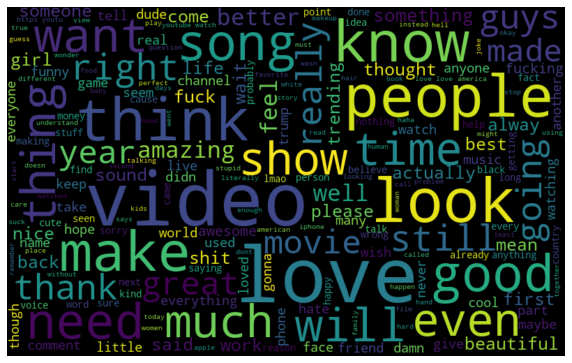

In [ ]:
all_words = ' '.join([text for text in US_comentarios['comment_text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Nuvem de palavras, comentários POSITIVOS

In [ ]:
all_words_posi = ' '.join([text for text in US_comentarios['comment_text'][US_comentarios.Sentiment == 'Positive']])

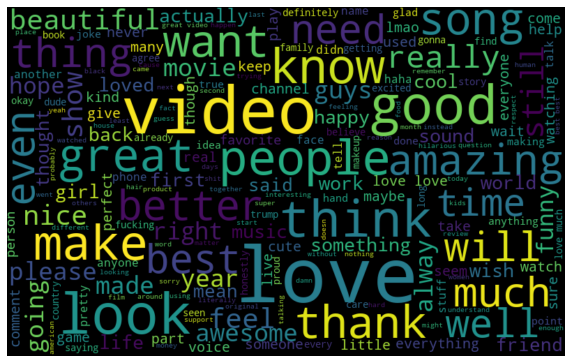

In [ ]:
wordcloud_posi = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_posi)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_posi, interpolation="bilinear")
plt.axis('off')
plt.show()

# Nuvem de palavras, comentários NEGATIVOS

In [ ]:
all_words_nega = ' '.join([text for text in US_comentarios['comment_text'][US_comentarios.Sentiment == 'Negative']])

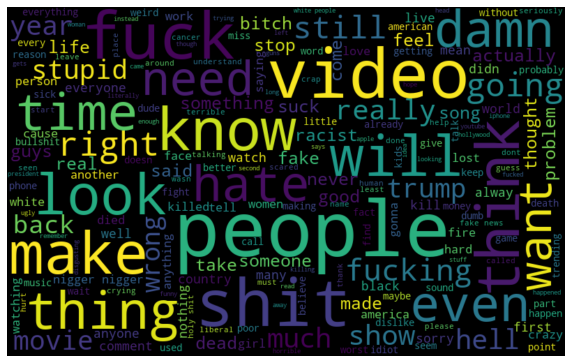

In [ ]:
wordcloud_nega = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_nega)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_nega, interpolation="bilinear")
plt.axis('off')
plt.show()

# Nuvem de palavras, comentários NEUTROS

In [ ]:
all_words_neu = ' '.join([text for text in US_comentarios['comment_text'][US_comentarios.Sentiment == 'Neutral']])

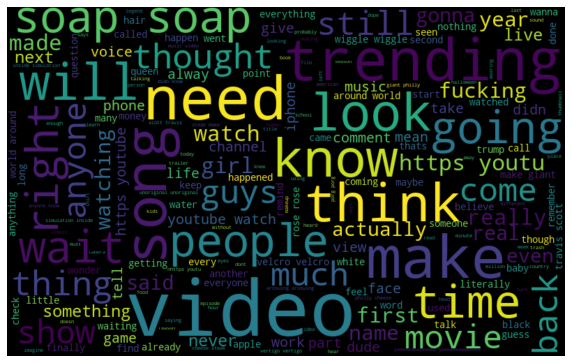

In [ ]:
wordcloud_neu = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_neu)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_neu, interpolation="bilinear")
plt.axis('off')
plt.show()